# OTA settling survey

This interactive document is intended to keep track of the state-of-the-art operational transconductance circuits (OTAs) designed for fast settling. This information elaborated using the Figures of Merit (FOMs) discussed in [Slew-Rate Enhancement Techniques for Switched-Capacitors Fast-Settling Amplifiers: A Review, Chips 2024, 3(2), 98-128; https://doi.org/10.3390/chips3020005] can be used to guide the design of optimal OTAs for switched-capacitors (SC) applications.

## Imports and settings

Required modules: numpy, matplotlib, pandas

The xlsx spreadsheet is **ota-settling-survey.xlsx** contained in the same path as this notebook.

## Data structure ##

The **namespace** is populated with variables corresponding to the column name of xlsx file. Besides, variables are assigned for easy manipulation. The assignment can also be used for debugging of the xlsx file.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x0 = pd.read_excel('ota-settling-survey.xlsx', header=1)
units = x0.iloc[0]
x = x0.iloc[1:]

DOI = np.array(x['DOI'])
AU1 = np.array(x['AU1'])
YEAR = np.array(x['YEAR'], dtype=np.int16)
CMOS = np.array(x['CMOS'].fillna(0), dtype=np.int16)
NS = np.array(x['NS'], dtype=np.int8)
BETA = np.array(x['BETA'], dtype=np.single)
CLE = np.array(x['CLE'], dtype=np.single)
SUP = np.array(x['SUP'], dtype=np.single)
DVS = np.array(x['DVS'], dtype=np.single)
SRP = np.array(x['SRP'], dtype=np.single)
SRN = np.array(x['SRN'], dtype=np.single)
UGF = np.array(x['UGF'], dtype=np.single)
TSP = np.array(x['TSP'], dtype=np.single)
TSN = np.array(x['TSN'], dtype=np.single)
SERR = np.array(x['SERR'], dtype=np.single)
PWR = np.array(x['PWR'], dtype=np.single)
AREA = np.array(x['AREA'], dtype=np.single)
A0 = np.array(x['A0'], dtype=np.single)
PM = np.array(x['PM'], dtype=np.single)

## Figures of Merit ##

Figure of Merits are defined as:

\begin{equation}
\mathrm{FOML} = \frac{\mathrm{SR} \times C_{LE}}{\mathrm{PWR}}
\end{equation}

\begin{equation}
\mathrm{FOMS} = \frac{\mathrm{UGF} \times C_{LE}}{\mathrm{PWR}}
\end{equation}

\begin{equation}
\mathrm{FOMT} = \frac{C_{LE}}{t_\mathrm{SET}\times\mathrm{PWR}}
\end{equation}

\begin{equation}
\mathrm{FOMN} = \frac{C_{LE}\times\Delta V_S}{t_\mathrm{SET}\times\mathrm{I_{DD}}}
\end{equation}

In the last equation $I_{DD}$ indicates the drawn from the supply ($I_{DD} = \mathrm{PWR}/V_{DD}$).

In [2]:
def minimum_excluding_nans(x1, x2):
    # similar to numpy.minimum, calculates the element-wise minimum of two arrays. 
    # It handles cases where elements are NaN in one array but not the other, replacing NaNs in the result with the corresponding values from the other array
    xx = np.minimum(x1, x2)
    xx[np.isnan(x1)] = x2[np.isnan(x1)]
    xx[np.isnan(x2)] = x1[np.isnan(x2)]
    return xx

def maximum_excluding_nans(x1, x2):
    # similar to numpy.maximum, calculates the element-wise maximum of two arrays. 
    # It handles cases where elements are NaN in one array but not the other, replacing NaNs in the result with the corresponding values from the other array
    xx = np.maximum(x1, x2)
    xx[np.isnan(x1)] = x2[np.isnan(x1)]
    xx[np.isnan(x2)] = x1[np.isnan(x2)]
    return xx
    
# extract worst-case conditions
SR = minimum_excluding_nans(SRP, SRN)
TS = maximum_excluding_nans(TSP, TSN)

# calaculate the FOMs
FOMS = UGF*CLE/PWR
FOML = SR*CLE/PWR
FOMT = CLE/(TS*PWR)
FOMN = DVS*FOMT*SUP

# add to dataframe
pd.options.mode.chained_assignment = None  # default='warn'
x.loc[:, 'FOMS'] = pd.Series(FOMS)
x.loc[:, 'FOML'] = pd.Series(FOML)
x.loc[:, 'FOMT'] = pd.Series(FOMT)
x.loc[:, 'FOMN'] = pd.Series(FOMN)

## Data Analysis and Representation

Data can be used to classify designs in terms of performance, as well as to discuss the degree of adequacy of the FOMs. Output can be represented both in tabular or in graphical form.

### Straightforward classification

In [3]:
def print_sorted(sort_key, number=10, print_key_list=['DOI', 'AU1', 'YEAR', 'CLE', 'PWR'], df=x):
    sorted_x = x.sort_values(by=sort_key, ascending=False)
    key_list = print_key_list[:]
    key_list.append(sort_key)
    print(sorted_x[key_list][0:number-1])

print('-'*80+'\nTOP 10 sorted by FOMS')
print_sorted('FOMS')

print('-'*80+'\nTOP 10 sorted by FOML')
print_sorted('FOML')

print('-'*80+'\nTOP 10 sorted by FOMT')
print_sorted('FOMT')

print('-'*80+'\nTOP 10 sorted by FOMN')
print_sorted('FOMN')


--------------------------------------------------------------------------------
TOP 10 sorted by FOMS
                            DOI   AU1    YEAR    CLE    PWR         FOMS
24    10.1109/TCSI.2016.2584919  Hong  2016.0   1500    7.4  3445.945801
23    10.1109/TCSI.2016.2584919  Hong  2016.0    100    7.4   344.594604
54    10.1109/JSSC.2014.2364037   Tan  2014.0    330   12.7   180.440933
52    10.1109/TCSI.2014.2333364   Mak  2014.0   4400   36.5   150.438354
51   10.1109/ISSCC.2014.6757438    Qu  2014.0    500    6.3   130.191788
53    10.1109/TCSI.2014.2333364   Mak  2014.0  19000   36.5   109.393707
50  10.1109/ISSCC.2012.6177044    Yan  2012.0  15000    144   106.349205
49  10.1109/ISSCC.2012.6177044    Yan  2012.0   1000    144    98.958336
79   10.1109/TVLSI.2019.2918235  Paul  2019.0     50  189.6    92.307693
--------------------------------------------------------------------------------
TOP 10 sorted by FOML
                            DOI     AU1    YEAR    CLE   PWR    

In [4]:
def apa_style_annotations():
    # simple function to create an 'Author+Year' string to annotate the scatter plots
    y = YEAR.astype(str)
    return (AU1+y).astype(str)

def ns_to_color(ii):
    # simple function to select a color associated to the NS field
    npx = x['NS'].to_numpy()
    if npx[ii] == 1: 
        cl = 'blue'
    elif npx[ii] == 2:
        cl = 'red'
    elif npx[ii] == 3:
        cl = 'green'
    else:
        cl = 'black'
    return cl

### FOM scatter plots

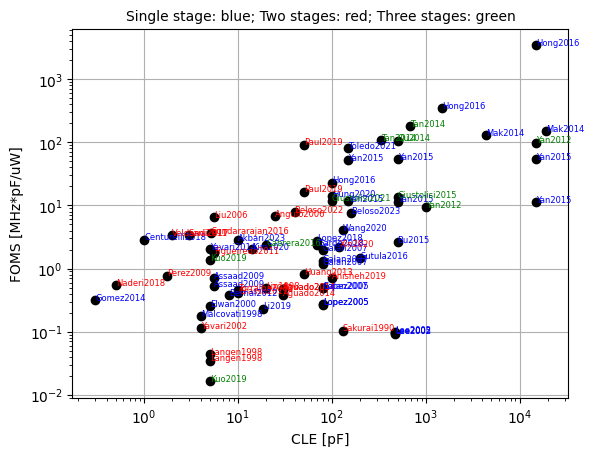

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(CLE, FOMS, 'ko')
ax.set_xlabel('CLE [pF]')
for ii, annotation in enumerate(apa_style_annotations()):
    xx=CLE[ii] 
    yy=FOMS[ii]
    if np.isfinite(xx) and np.isfinite(yy):
        ax.text(xx, yy, annotation, color=ns_to_color(ii), fontsize=6)
ax.set_ylabel('FOMS [MHz*pF/uW]')
ax.set_title('Single stage: blue; Two stages: red; Three stages: green', fontsize=10)
ax.grid()

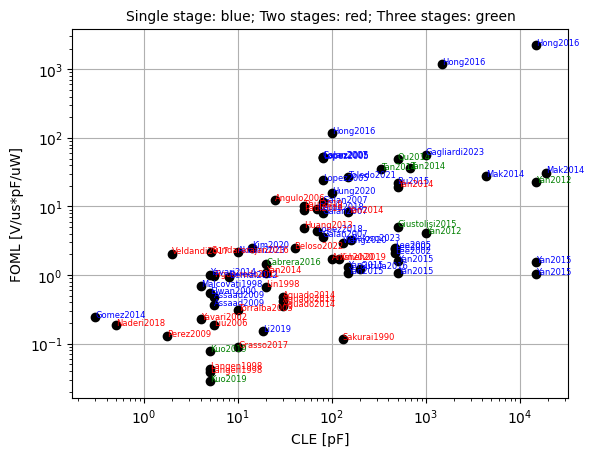

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(CLE, FOML, 'ko')
ax.set_xlabel('CLE [pF]')
for ii, annotation in enumerate(apa_style_annotations()):
    xx=CLE[ii] 
    yy=FOML[ii]
    if np.isfinite(xx) and np.isfinite(yy):
        ax.text(xx, yy, annotation, color=ns_to_color(ii), fontsize=6)
ax.set_ylabel('FOML [V/us*pF/uW]')
ax.set_title('Single stage: blue; Two stages: red; Three stages: green', fontsize=10)
ax.grid()

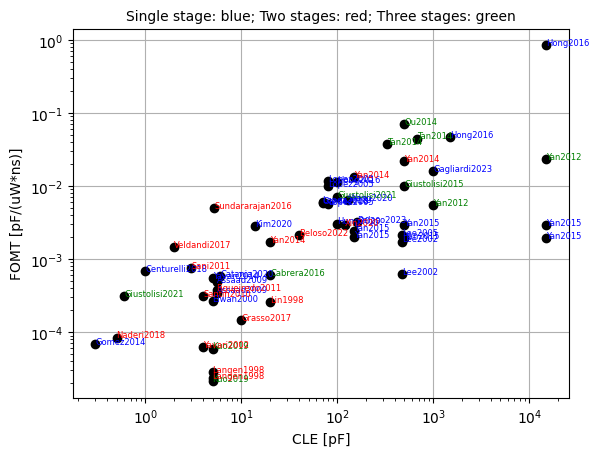

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(CLE, FOMT, 'ko')
ax.set_xlabel('CLE [pF]')
for ii, annotation in enumerate(apa_style_annotations()):
    xx=CLE[ii] 
    yy=FOMT[ii]
    if np.isfinite(xx) and np.isfinite(yy):
        ax.text(xx, yy, annotation, color=ns_to_color(ii), fontsize=6)
ax.set_ylabel('FOMT [pF/(uW*ns)]')
ax.set_title('Single stage: blue; Two stages: red; Three stages: green', fontsize=10)
ax.grid()

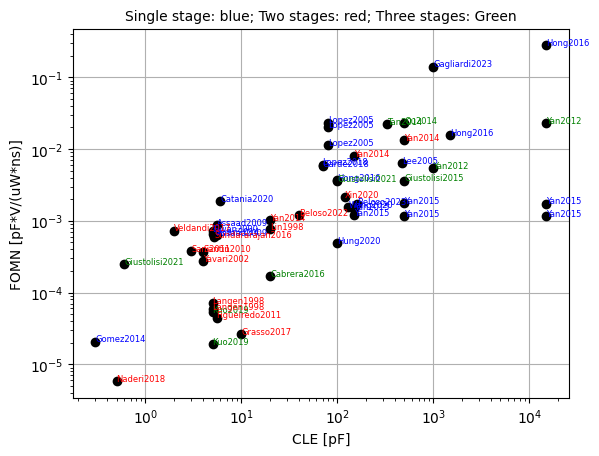

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(CLE, FOMN, 'ko')
ax.set_xlabel('CLE [pF]')
for ii, annotation in enumerate(apa_style_annotations()):
    xx=CLE[ii] 
    yy=FOMN[ii]
    if np.isfinite(xx) and np.isfinite(yy):
        ax.text(xx, yy, annotation, color=ns_to_color(ii), fontsize=6)
ax.set_ylabel('FOMN [pF*V/(uW*ns)]')
ax.set_title('Single stage: blue; Two stages: red; Three stages: Green', fontsize=10)
ax.grid()

### Impact of CMOS technology node

Designs displayed for FOM

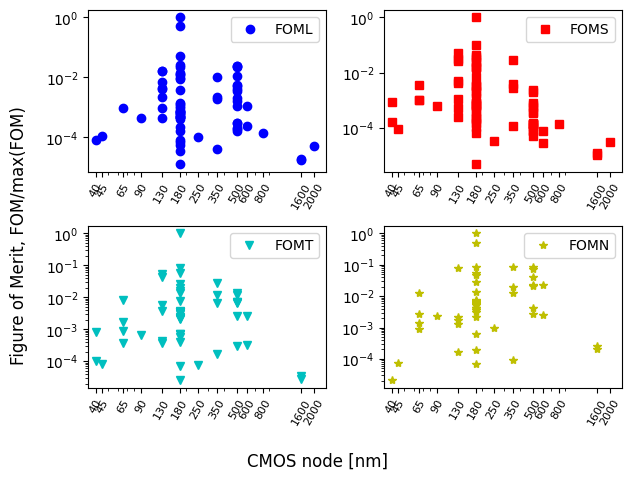

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=2)

from matplotlib import ticker

ax[0,0].plot(CMOS, FOML/max(FOML), 'bo', label='FOML')
ax[0,1].plot(CMOS, FOMS/max(FOMS), 'rs', label='FOMS')
ax[1,0].plot(CMOS, FOMT/max(FOMT), 'cv', label='FOMT')
ax[1,1].plot(CMOS, FOMN/max(FOMN), 'y*', label='FOMN')
for i in range(4):
    j, k = i%2, int(i/2)%2
    ax[j,k].set_xscale('log')
    ax[j,k].set_yscale('log')
    ax[j,k].legend()
    #ax[j,k].set_xlabel('CMOS node [nm]')
    #ax[j,k].set_ylabel('Figure of Merit,\n FOM/max(FOM)')
    CMOS_no_dups = list(dict.fromkeys(CMOS))
    ax[j,k].xaxis.set_ticks(CMOS_no_dups)
    ax[j,k].set_xticklabels(ax[j,k].get_xticks(), rotation=60, fontsize=8)
    ax[j,k].set_xlim([35, 2500])
fig.supxlabel('CMOS node [nm]')
fig.supylabel('Figure of Merit, FOM/max(FOM)')
fig.tight_layout()
pass

### FOMs by OTA architecture

In [10]:
FOM_max_list = []
for ii in range(1, 4):
    jj = np.where(x['NS'].to_numpy()==ii)
    ndesigns = len(jj[0])
    mx = max(FOML[jj]), max(FOMS[jj]), max(FOMT[jj]), max(FOMN[jj]), ndesigns
    FOM_max_list.append(mx)
FOM_max = np.reshape(FOM_max_list, (3,5))

# index names 
index_values = ['Single stage', 'Two stages', 'Three stages'] 
   
#  column names 
column_values = ['FOML', 'FOMS', 'FOMT', 'FOMN', 'N of designs'] 
  
# creating the dataframe 
x_max = pd.DataFrame(data = FOM_max,  
                  index = index_values,  
                  columns = column_values) 
print(x_max)

                     FOML         FOMS      FOMT      FOMN  N of designs
Single stage  2229.729736  3445.945801  0.844595  0.278716          42.0
Two stages      19.444443    92.307693       NaN       NaN          28.0
Three stages    49.206348   180.440933  0.070862  0.023200          12.0


Please note that eventual NaNs in the previous database are due to missing parameters to properly calculate the FOMs.

### Correlations between different FOMs

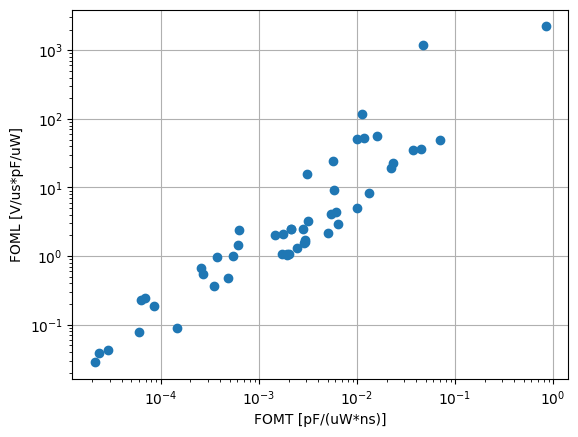

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(FOMT, FOML, 'o')
ax.set_xlabel('FOMT [pF/(uW*ns)]')
ax.set_ylabel('FOML [V/us*pF/uW]')
ax.grid()

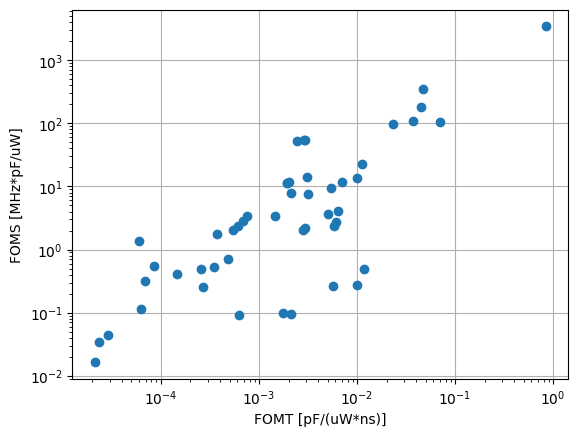

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(FOMT, FOMS, 'o')
ax.set_xlabel('FOMT [pF/(uW*ns)]')
ax.set_ylabel('FOMS [MHz*pF/uW]')
ax.grid()

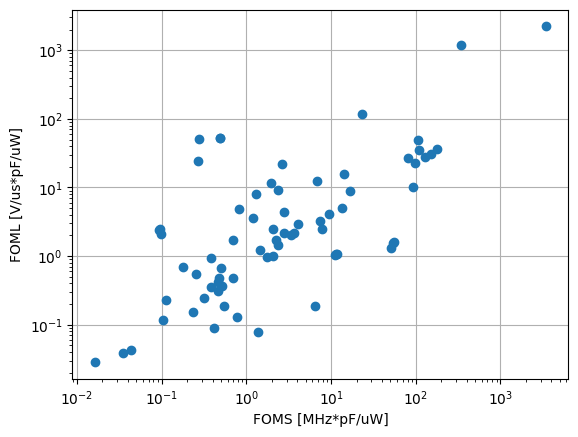

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(FOMS, FOML, 'o')
ax.set_xlabel('FOMS [MHz*pF/uW]')
ax.set_ylabel('FOML [V/us*pF/uW]')
ax.grid()